<a href="https://colab.research.google.com/github/AlexLeop/ML_Recursos_Humanos/blob/main/Departamento_Recursos_Humanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Departamento de Recursos Humanos**

###**Base de dados:**
*   https://www.kaggle.com/pavansubhasht/ibm-hr-analitics-attrition-dataset

#####**Calcúlo de Salário:**
*   https://www.mom.gov.sg/employment-practices/salary/monthly-and-daily-salary e
*   https://www.sprout.zendesk.com/hc/en-us/articles/360030922133/How-to-Calculate-for-the-Daily-Rate-from-Your-Monthly-Salary

#####**Stock:**
*   https://www.moneyunder30.com/employee-stock-options#:~:text=Typically%20they%20are%20granted%20to.a%20especific%20period%20of%20time



In [64]:
"""Importando as bibliotecas necessárias"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
trabalhador_df = pd.read_csv('./Human_Resources.csv')

### **Transformação e Análize Exploratória de dados**

In [66]:
class recursos_humsnos:
    def __init__(self, dados) -> None:
        self.dados = dados

    def Verifia_dados_nulos(self):
        """ Verificando se há dados núlos através de um grafico de mapa de calor na base de dados """
        mapa_calor = sns.heatmap(self.dados.isnull(), cbar=None);
        return mapa_calor

    def verifica_distribuicao_f(self):
        """ Criando um gráfico para análise da distribuição de todas as colunas do Dataset """
        dist_f = self.dados.hist(bins=30, figsize=(20,20), color='r');
        return dist_f

    def verifica_correlacao(self):
        """Criando correlação entre colunas do Dataset"""
        correlacao = self.dados.corr()

        """Criando gráfico Heatmap"""
        f, ax = plt.subplots(figsize=(28,15))
        return sns.heatmap(correlacao, annot=True);
    
    def transformar_dados(self):
        """Modificando a coluna [Attrition, Over18, OverTime] de (Yes or No) para (1 ou 0) utilizando a função lambda"""
        self.dados['Attrition'] = self.dados['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
        self.dados['Over18']    = self.dados['Over18'].apply(lambda x: 1 if x == 'Yes' else 0)
        self.dados['OverTime']  = self.dados['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

        """ Removendo as colunas de valor único """
        trabalhador_df.drop(['EmployeeCount', 'StandardHours','Over18', 'EmployeeNumber'], axis=1, inplace=True)
        return self.dados

In [67]:
rh = recursos_humsnos(trabalhador_df)
dado_novo = rh.transformar_dados()

###**Pré-processamento e bases de Treinamento / Teste**

In [68]:
""" Importando as bibliotecas necessárias """
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from typing import Type


onehotencoder = OneHotEncoder() # Instanciando a função OneHotEncoder
scaler = MinMaxScaler() # Instanciando MinMaxScaler


class preprocessamento:
    def __init__(self, dados_base) -> None:
        self.data = dados_base

    def separar_numericos(self):
        """ Isolando todos os atributos númericos do Dataset [self.data] e atribuido à variavel [X_numericos] """
        X_numericos = self.data.select_dtypes(include=['int64'])
        X_numericos.drop(['Attrition'], axis=1, inplace=True) # Removendo a coluna Attrition do Dataset [X_numericos]

        return X_numericos

    def separar_categoricos(self):
        """Isolando os atributos categóricos para um Dataset atribuido à variavel X_cat"""
        X_cat = self.data[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

        return X_cat

    def aplicar_dammy(self, X_cat):
        """ 
        Gerando variáves Dammy (variable dummy) para a transformação do Dataset X_cat 
        atravéis da função OneHotEncoder do ScikitLearn e modificando o Dataset para um Array
        """
        global onehotencoder
        X_cat = onehotencoder.fit_transform(X_cat).toarray() # Transformando a variavel X_cat em um Array de variaveis Dammy
        X_cat = pd.DataFrame(X_cat) # Convetendo o Dataset X_cat novamente para um DataFrame

        return X_cat

    def unir_dataset(self, X_cat, X_numericos):
        """Concatenando os Dataset X_cat e X_numericos"""
        X_all = pd.concat([X_cat, X_numericos], axis=1)

        return X_all

    def normalizando_data(self, X_all):
        # Aplicando a normalização do Dataset [X_all]
        global scale
        X = scaler.fit_transform(X_all) # Normalizando [X_all]

        return X

    def atributo_previsor(self):
        # Definindo à variavel [y] os atributos previsores
        y = self.data['Attrition']

        return y

    def definindo_testtreino(self, X, y):
        # Declarando as variaveis [X e y] de Treino e Teste com cada variavel contendo 1/4 do Dataset  
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

        return X_train, y_train, X_test, y_test

In [69]:
rl = preprocessamento(dado_novo) # Instanciando a classe preprocessamento
unind = rl.unir_dataset(rl.aplicar_dammy(rl.separar_categoricos()), rl.separar_numericos()) # Chamando o methodo unir_dataset da classe preprocessamento
treinamento_ml = rl.definindo_testtreino(rl.normalizando_data(unind), rl.atributo_previsor())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


### **Avaliação do Modelo - KPIs**

In [70]:
class metricaseavaliacoes:
    """ Classe responsável pela avaliação do modelo de Regressão Logística """
    def __init__(self, valortest , preditor) -> None:
        self.valorestest = valortest
        self.y_pred = preditor
        self.y_test = valortest[3]
        
    def ScoreAcuracia(self):
        """ Calcular o score da acurácia """
        score_ac = accuracy_score(self.y_test, self.y_pred)
        return print('A acurácia deste modelo é: {:.2f}%'.format(score_ac * 100))

    def MatrizDeConfusao(self):
        """Passando como parametros as variaves de teste e predição para a instancia da matriz de confusão"""
        mc = confusion_matrix(self.y_test, self.y_pred)
        mp_calor = sns.heatmap(mc, annot=True); # Plotando o gráfico da matriz de confusão
        return print(mc), mp_calor

    def ClassificacaoKPIs(self):
        return classification_report(self.y_test, self.y_pred)

### **Modelo de Regressão Logística**

In [71]:
""" Importando bibliotecas necessárias aplicação da regressão logística"""
from sklearn.linear_model import LogisticRegression
import sklearn

""" Importando bibliotecas necessárias para avaliação do modelo de regressão logística """
from sklearn.metrics import accuracy_score # Biblioteca para valiação a Acurácia
from sklearn.metrics import precision_score # Biblioteca para avaliar a precisão
from sklearn.metrics import recall_score # Biblioteca para avaliar o recall
from sklearn.metrics import f1_score # Biblioteca para avaliar toda a base de dados
from sklearn.metrics import classification_report # Biblioteca para reportar a classificação

""" Importando biblioteca necessária para gerar a matriz de confusão deste modelo """
from sklearn.metrics import confusion_matrix

Mod_logistico = LogisticRegression() # Instanciando a classe LogisticRegression

class regressao_log:
    def __init__(self, dadostrainotest) -> None:
        self.dadostrainotest = dadostrainotest
        self.X_train = dadostrainotest[0]
        self.y_train = dadostrainotest[1]
        self.X_test =  dadostrainotest[2]
        self.y_test =  dadostrainotest[3]

    def treinar_ModeloRegressao(self):
        global Mod_logistico
        Mod_logistico.fit(self.X_train, self.y_train) # Treinando o modelo
        return Mod_logistico

    def definindo_preditor_regressivo(self, Mod_logistico):
        y_pred = Mod_logistico.predict(self.X_test) # Criando variavel de predição
        return y_pred

In [72]:
Mod_RL = regressao_log(treinamento_ml) # Instanciando o modelo de regressão logística passando dados pre-processados
treinar = Mod_RL.definindo_preditor_regressivo(Mod_RL.treinar_ModeloRegressao()) # trainando o modelo
treinar

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [73]:
metricas_RL = metricaseavaliacoes(treinamento_ml, treinar) # Instanciando a classe de treinamento do modelo de Regressão Logistica

[[304   5]
 [ 34  25]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       309
           1       0.83      0.42      0.56        59

    accuracy                           0.89       368
   macro avg       0.87      0.70      0.75       368
weighted avg       0.89      0.89      0.88       368



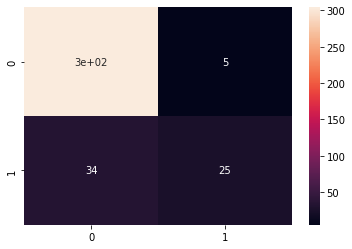

In [74]:
""" Exibindo Métricas Regressão Logística """

metricas_RL.MatrizDeConfusao() # Matriz de confusão
print(metricas_RL.ClassificacaoKPIs()) # Classificador de KPIs

### **Modelo de Random Forest**

In [85]:
""" Importação das bibliotecas necessárias para aplicação da arvore de decisão """
from sklearn.ensemble import RandomForestClassifier


class arvore_decisao:
    def __init__(self, dadostreino) -> None:
        self.X_train = dadostreino[0]
        self.y_train = dadostreino[1]
        self.X_test = dadostreino[2]

    def ArvoreTreinar(self):
        """ Instanciando e treinando o modelo de Random Forest """
        arvore = RandomForestClassifier() # Instanciando
        arvore.fit(self.X_train, self.y_train) # Realizando o treinamento
        return arvore

    def DefinindoPreditorArvore(self, arvore):
        y_pred = arvore.predict(self.X_test) # Gerando a variavel preditora
        return y_pred


In [86]:
Mod_RF = arvore_decisao(treinamento_ml)
treinar_arvore = Mod_RF.DefinindoPreditorArvore(Mod_RF.ArvoreTreinar())


In [87]:
metricas_RF = metricaseavaliacoes(treinamento_ml, treinar_arvore) # Instanciando a classe de treinamento do modelo de Random Forest


[[308   1]
 [ 49  10]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       309
           1       0.91      0.17      0.29        59

    accuracy                           0.86       368
   macro avg       0.89      0.58      0.61       368
weighted avg       0.87      0.86      0.82       368



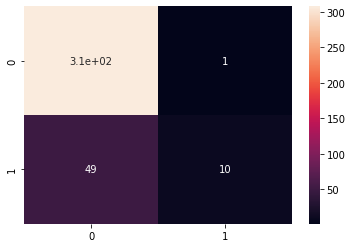

In [88]:
""" Exibindo Métricas Random Forest """

metricas_RF.MatrizDeConfusao() # Matriz de confusão
print(metricas_RF.ClassificacaoKPIs()) # Classificador de KPIs

### **Implementação de Redes Neurais - TensorFlow**

In [89]:
""" Importando bibliotecas necessárias """
import tensorflow as tf


class r_neural:
    def __init__(self, X, dadostt) -> None:
        """ Formula para definir a quantidade de neuronios deverá ser implementado na rede neural QN = (QE + QS) / 2 """
        self.X = X
        self.QE = len(self.X[0]) # Quantidade de entradas (colunas no dataset)
        self.QS = 1 # Somatorio da quantidade de saídas esperada
        self.QN = int((self.QE + self.QS) / 2) # Quantidade de Neuronios
        self.X_train = dadostt[0]
        self.y_train = dadostt[1]
        self.X_test = dadostt[2]

    def CriarNeuronios(self):
        rede_neural = tf.keras.models.Sequential() # Definindo neuronios

        """ Camadas ocultas """
        rede_neural.add(tf.keras.layers.Dense(units=self.QN, activation='relu', input_shape=(self.QE,)))
        rede_neural.add(tf.keras.layers.Dense(units=self.QN, activation='relu'))
        rede_neural.add(tf.keras.layers.Dense(units=self.QN, activation='relu'))

        """ Camada de saída """
        rede_neural.add(tf.keras.layers.Dense(units=self.QS, activation='sigmoid'))
        return rede_neural

    def SumarioRedeNeural(self, rede_neural: Type[CriarNeuronios]):
        """ Visualisando o sumario da rede neural """
        return rede_neural.summary()

    def CompilarRedeNeural(self,rede_neural):
        """ Compilando a rede neural """
        rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics='accuracy')
        return rede_neural
    
    def NeuronioTreinar(self, rede_neural):
        rede_neural.fit(self.X_train, self.y_train, epochs=200) # Treinando a rede neural
        return rede_neural
        
    def definindo_preditor_Neural(self, rede_neural):
        y_pred = rede_neural.predict(self.X_test) # Variavel preditora
        y_pred = (y_pred >= 0.5) # formatando a variavel preditora para True ou False
        return y_pred

In [ ]:
Mod_RN = r_neural(rl.normalizando_data(unind), treinamento_ml)
compilar_RN = Mod_RN.CompilarRedeNeural(Mod_RN.CriarNeuronios())
treinar_RN = Mod_RN.definindo_preditor_Neural(Mod_RN.NeuronioTreinar(compilar_RN))


In [91]:
metricas_RN = metricaseavaliacoes(treinamento_ml, treinar_RN) # Instanciando a classe de treinamento do modelo de Random Forest

[[291  18]
 [ 39  20]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       309
           1       0.53      0.34      0.41        59

    accuracy                           0.85       368
   macro avg       0.70      0.64      0.66       368
weighted avg       0.82      0.85      0.83       368



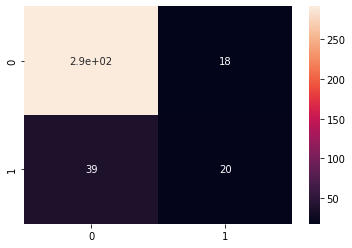

In [92]:
""" Exibindo Métricas Redes Neurais """

metricas_RN.MatrizDeConfusao() # Matriz de confusão
print(metricas_RN.ClassificacaoKPIs()) # Classificador de KPIs

### **Salvando Classificador**

In [93]:
""" Importando biblioteca necessária """
import pickle


with open('Modelo_Regressão_logista.pkl', 'wb') as f:
    pickle.dump([onehotencoder, scaler, Mod_logistico], f)

### **Testando Classificador**

In [94]:
""" Abrindo o arquivo do modelo realizando a leitura e atribuindo as variaveis encolder,min_max e model """

with open('Modelo_Regressão_logista.pkl', 'rb') as f:
    encolder, min_max, model = pickle.load(f)

In [95]:
""" Acessando os atribuitos das variaveis """

encolder, min_max, model

(OneHotEncoder(), MinMaxScaler(), LogisticRegression())

In [96]:
"""Criando um novo registro para testar o modelo"""

X_novo = trabalhador_df.iloc[0:1]
X_novo

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


In [97]:
"""Separando atributos categóricos de X_novo"""

X_cat_novo = X_novo.select_dtypes(include=['object'])
X_cat_novo

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single


In [98]:
"""Transformando em variaveis Dammy e convertendo em Array"""

X_cat_novo = encolder.transform(X_cat_novo).toarray()
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [99]:
"""Separando atributos numericos de X_numerico_novo"""

X_numerico_novo = X_novo.select_dtypes(include=['int64'])
X_numerico_novo.drop(['Attrition'], axis=1, inplace=True)
X_numerico_novo

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5


In [100]:
"""Concatenando atributos numericos e categóricos"""

X_all_novo = pd.concat([X_cat_novo, X_numerico_novo], axis=1)
X_all_novo

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5


In [101]:
"""normalizando os dados de teste"""

X_novo = min_max.transform(X_all_novo) 
X_novo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.54761905, 0.71581961, 0.        , 0.25      ,
        0.33333333, 0.91428571, 0.66666667, 0.25      , 1.        ,
        0.26245392, 0.6980526 , 0.88888889, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.15      , 0.22222222, 0.        , 0.29411765]])

In [102]:
"""Chamando o modelo e prevendo o resultado"""

model.predict(X_novo)

array([1])

In [103]:
"""Probabilidade dos resultados possíveis"""

model.predict_proba(X_novo)

array([[0.33686339, 0.66313661]])

In [104]:
"""Indicação dos indices da classe de model"""

model.classes_

array([0, 1])